In [13]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.models import Sequential

PreProcessing

In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

1


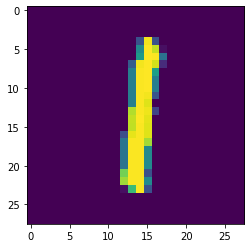

In [15]:
plt.imshow(x_train[1910])
print(y_train[1910])

In [16]:
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255

In [17]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [18]:
x_test.shape

(10000, 28, 28, 1)

In [19]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [ ]:
y_test

MODEL

In [20]:
model=Sequential()

In [21]:
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [23]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [24]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

mc=ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1)

cb=[es,mc]

In [25]:
his=model.fit(x_train,y_train,epochs=5,validation_split=0.3,callbacks=cb)

Epoch 1/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.9344WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: saving model to .\bestmodel.h5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.2180 - accuracy: 0.9344 - val_loss: 0.0845 - val_accuracy: 0.9739
Epoch 2/5
   3/1313 [..............................] - ETA: 34s - loss: 0.1438 - accuracy: 0.9688

c:\Users\rampr\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1312/1313 [============================>.] - ETA: 0s - loss: 0.0749 - accuracy: 0.9765WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: saving model to .\bestmodel.h5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0706 - val_accuracy: 0.9784
Epoch 3/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9826WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 3: saving model to .\bestmodel.h5
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0589 - val_accuracy: 0.9820
Epoch 4/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9854WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which 

In [26]:
model_s=keras.models.load_model('bestmodel.h5')

In [27]:
score=model_s.evaluate(x_test,y_test)
print(score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0321 - accuracy: 0.9891
0.9890999794006348
